In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:,.2f}".format

In [11]:
CNAE_CBO_SEXO_2019_FREQ = pd.read_csv("../data/cleaned/CNAE_CBO_SEXO_2019_freq.csv", sep = ";", index_col = 0, encoding = 'latin-1', skipinitialspace = True)
CNAE_CBO_SEXO_2019_SUM = pd.read_csv("../data/cleaned/CNAE_CBO_SEXO_2019_sum.csv", sep = ";", index_col = 0, encoding = 'latin-1', skipinitialspace = True)

CNAE_CBO_SEXO_2019_SUM

,620_M,620_F,631_M,631_F
CBO,,,,
1236,"14,119,591.78","1,925,808.44","1,341,897.36","400,845.89"
1425,"126,749,394.34","34,250,385.31","12,074,624.70","2,696,317.74"
2122,"38,126,913.27","4,588,985.32","7,541,340.31","953,891.81"
2123,"48,500,293.06","8,395,918.66","6,582,728.33","630,752.99"
2124,"613,732,276.11","146,834,836.98","66,131,278.43","15,641,804.89"
3171,"150,984,907.25","22,270,888.89","9,268,820.17","1,150,304.96"
3172,"49,179,218.30","14,888,919.20","9,696,404.44","2,810,834.92"


In [14]:
frequencia_masc = (CNAE_CBO_SEXO_2019_FREQ['620_M'] + CNAE_CBO_SEXO_2019_FREQ['631_M']).sum()
frequencia_fem = (CNAE_CBO_SEXO_2019_FREQ['620_F'] + CNAE_CBO_SEXO_2019_FREQ['631_F']).sum()
frequencia_total = frequencia_masc + frequencia_fem

porcentagem_freq_masc = (frequencia_masc / frequencia_total) * 100
porcentagem_freq_fem = (frequencia_fem / frequencia_total) * 100

massa_salarial_masc = (CNAE_CBO_SEXO_2019_SUM['620_M'] + CNAE_CBO_SEXO_2019_SUM['631_M']).sum()
massa_salarial_fem = (CNAE_CBO_SEXO_2019_SUM['620_F'] + CNAE_CBO_SEXO_2019_SUM['631_F']).sum()
massa_salarial_total = massa_salarial_masc + massa_salarial_fem

porcentagem_massa_masc = (massa_salarial_masc / massa_salarial_total) * 100
porcentagem_massa_fem = (massa_salarial_fem / massa_salarial_total) * 100

media_masc = massa_salarial_masc / frequencia_masc
media_fem = massa_salarial_fem / frequencia_fem

In [15]:
dist_freq_geral = pd.DataFrame(
    {'Pessoas': [frequencia_masc, frequencia_fem], 
     'Pessoas (%)': [porcentagem_freq_masc, porcentagem_freq_fem],
     'Massa Salarial': [massa_salarial_masc, massa_salarial_fem], 
     'Massa Salarial (%)': [porcentagem_massa_masc, porcentagem_massa_fem],
     'Média Salarial': [media_masc, media_fem]}
)
dist_freq_geral.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_geral.rename_axis('Sexo', axis = 'columns', inplace = True)

dist_freq_geral

Sexo,Pessoas,Pessoas (%),Massa Salarial,Massa Salarial (%),Média Salarial
Masculino,193036,79.89,"1,154,029,687.85",81.76,"5,978.31"
Feminino,48592,20.11,"257,440,496.00",18.24,"5,298.00"


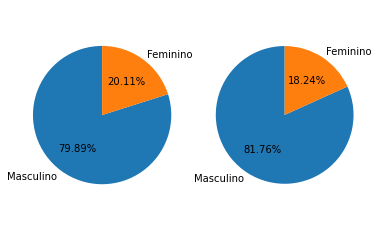

In [6]:
freq_fig, (freq_ax, massa_ax) = plt.subplots(1, 2)
freq_ax.pie(dist_freq_geral.Pessoas, labels = dist_freq_geral.index, autopct = '%1.2f%%', startangle = 90)
freq_ax.axis('equal')
massa_ax.pie(dist_freq_geral['Massa Salarial'], labels = dist_freq_geral.index, autopct = '%1.2f%%', startangle = 90)
massa_ax.axis('equal')
freq_fig.savefig("./figures/freq_massa_sexo_pie.svg")

In [81]:
variacao_media = ((dist_freq_geral['Média Salarial'][0] - dist_freq_geral['Média Salarial'][1])/dist_freq_geral['Média Salarial'][0]) * 100
print("As mulheres recebem {0:.4g} % a menos que os homens".format(variacao_media))

As mulheres recebem 11.38 % a menos que os homens


In [87]:
#Tabela de médias

frequencia_masc_df = CNAE_CBO_SEXO_2019_FREQ['620_M'] + CNAE_CBO_SEXO_2019_FREQ['631_M']
frequencia_fem_df = CNAE_CBO_SEXO_2019_FREQ['620_F'] + CNAE_CBO_SEXO_2019_FREQ['631_F']

massa_salarial_masc_df = CNAE_CBO_SEXO_2019_SUM['620_M'] + CNAE_CBO_SEXO_2019_SUM['631_M']
massa_salarial_fem_df = CNAE_CBO_SEXO_2019_SUM['620_F'] + CNAE_CBO_SEXO_2019_SUM['631_F']

media_salarial_masc_df = massa_salarial_masc_df / frequencia_masc_df
media_salarial_fem_df = massa_salarial_fem_df / frequencia_fem_df

CBO_SEXO_2019_FREQ = pd.DataFrame(
    {'Quant. Pessoas (M)': frequencia_masc_df,
     'Quant. Pessoas (M) %': (frequencia_masc_df / frequencia_masc) * 100,
     'Quant. Pessoas (F)': frequencia_fem_df,
     'Quant. Pessoas (F) %': (frequencia_fem_df / frequencia_fem) * 100}
)

CBO_SEXO_2019_SUM = pd.DataFrame(
    {'Massa Salarial (M)': massa_salarial_masc_df,
     'Massa Salarial (M) %': (massa_salarial_masc_df / massa_salarial_masc) * 100,
     'Massa Salarial (F)': massa_salarial_fem_df,
     'Massa Salarial (F) %': (massa_salarial_fem_df / massa_salarial_fem) * 100}
)
CBO_SEXO_2019_MEAN = pd.DataFrame(
     {'Média Salarial (M)': media_salarial_masc_df,
      'Média Salarial (F)': media_salarial_fem_df,
      'Diferença': ((media_salarial_masc_df - media_salarial_fem_df) / media_salarial_masc_df) * 100},
      index = CNAE_CBO_SEXO_2019_SUM.index
)
CBO_SEXO_2019_MEAN

,Média Salarial (M),Média Salarial (F),Diferença
CBO,,,
1236,"23,569.34","21,345.45",9.44
1425,"11,448.46","9,945.28",13.13
2122,"11,414.21","9,758.59",14.50
2123,"7,862.26","6,943.59",11.68
2124,"6,085.53","5,344.10",12.18
3171,"4,510.25","4,365.55",3.21
3172,"2,676.41","2,481.74",7.27
